### 支持向量机
1. 支持向量机（Support Vector Machine，SVM）是一个功能强大并且全面的机器学习模型，它能够执行线性或非线性分类、回归，甚至是异常值检测任务。
2. SVM特别适用于**中小型复杂数据集**的分类

#### 线性SVM分类
##### 大间隔分类
    
<img src="./images/SVM分类.png" width=700 height=200>

1. 在“街道以外”(间隔之外)的地方增加更多训练实例不会对决策边界产生影响，也就是说它完全由位于街道边缘的实例所决定（或者称之为“支持”​）​。这些实例被称为支持向量
2. SVM对特征的缩放非常敏感 -- 特征缩放会导致街道变形
    - <img src="./images/特征缩放对SVM的影响.png" width=700 height=200>

##### 软间隔分类
1. 硬间隔分类：严格地让所有实例都不在街道上，并且位于正确的一边，这就是硬间隔分类
    - 首先，它只在数据是线性可分离的时候才有效
    - 其次，它对异常值非常敏感
    - 图5-3显示了有一个额外异常值的鸢尾花数据：左图的数据根本找不出硬间隔，而右图最终显示的决策边界与我们在图5-1中所看到的无异常值时的决策边界也大不相同，可能无法很好地泛化。
        - <img src='./images/硬间隔SVM受异常值的影响.png' width=800 height=200>

2. 软间隔分类：尽可能在保持街道宽阔和限制间隔违例（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡，这就是软间隔分类。

##### Scikit-learn 参数设置
1. C是惩罚系数，即对误差的容忍度。
    - <img src='./images/SVM的超参数C.png' width=800 height=200>

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

/root/anaconda3/envs/landmark/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

与Logistic回归分类器不同，SVM分类器不会输出每个类的概率

In [20]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

#### 非线性SVM分类
1. 创建一个包含PolynomialFeatures转换器（见4.3节）的Pipeline，然后是StandardScaler和LinearSVC。

In [21]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
Polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

Polynomial_svm_clf.fit(X,y)

/root/anaconda3/envs/landmark/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

y_decision:  [[ -38.84909709  -36.54600977  -34.29855158 ...   88.7311236
    90.79155355   92.90371621]
 [ -37.73345607  -35.49154101  -33.30516002 ...   84.35572967
    86.36420974   88.42451762]
 [ -36.6178335   -34.43552672  -32.30865892 ...   80.13202493
    82.09011914   84.10013621]
 ...
 [-197.22587026 -193.57452575 -189.96958798 ...  104.07479982
   108.37805992  112.74227514]
 [-204.52806239 -200.7861825  -197.09061427 ...  105.99721524
   110.40023312  114.86430121]
 [-212.00560721 -208.17162793 -204.38386525 ...  107.89598562
   112.40032529  116.96581024]]


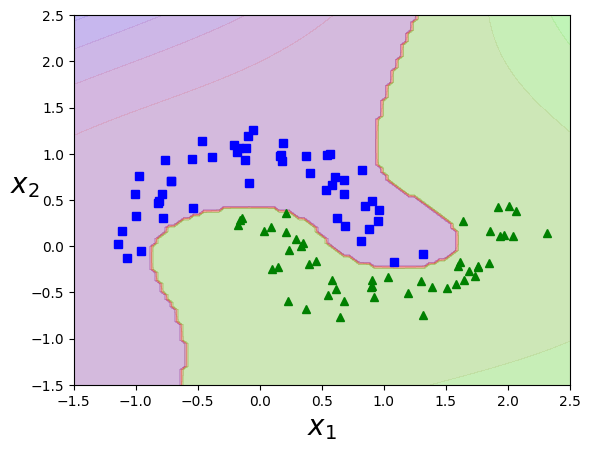

In [22]:
import matplotlib.pyplot as plt 

plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1.5, 2.5, 100)
# 让x0s和x1s组合成网格
x0, x1 = np.meshgrid(x0s, x1s)
# print(x0 == x0s)
X_new = np.c_[x0.ravel(), x1.ravel()]

zz = Polynomial_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = Polynomial_svm_clf.decision_function(X_new).reshape(x0.shape)
print('y_decision: ', y_decision)
plt.contourf(x0,x1,zz,cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0,x1, y_decision,cmap=plt.cm.brg, alpha=0.1)


##### 多项式内核
1. 如果多项式太低阶，则处理不了非常复杂的数据集。而高阶则会创造出大量的特征，导致模型变得太慢。
2. 超参数coef0控制的是模型受高阶多项式还是低阶多项式影响的程度
3. 寻找正确的超参数值的常用方法是网格搜索


In [23]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=10, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=10, kernel='poly'))])

y_decision:  [[  23.31877211   25.12758581   26.85614877 ...  109.61637929
   112.39472494  115.27662697]
 [  21.18823444   22.97578254   24.6826271  ...  103.9852239
   106.71929589  109.5569113 ]
 [  19.15480685   20.92278552   22.60960362 ...   98.62505314
   101.31700085  104.11249087]
 ...
 [-203.26309447 -197.04609147 -191.00867023 ...   40.94854334
    44.27600504   47.71779147]
 [-210.06980842 -203.72892845 -197.56960176 ...   40.39926356
    43.76068182   47.23632758]
 [-217.06537152 -210.59831824 -204.31481732 ...   39.78986357
    43.18586303   46.69598297]]


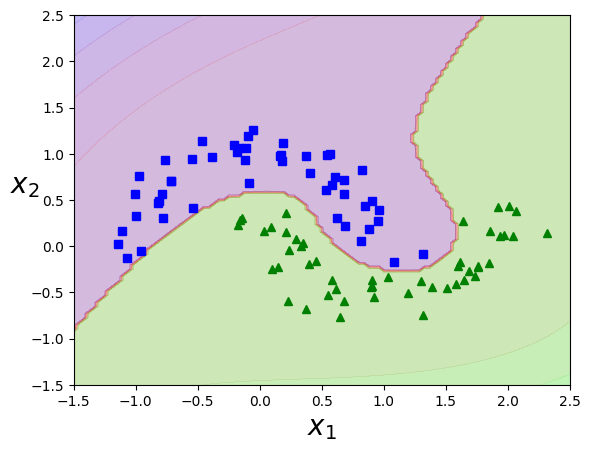

In [24]:
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1.5, 2.5, 100)
# 让x0s和x1s组合成网格
x0, x1 = np.meshgrid(x0s, x1s)
# print(x0 == x0s)
X_new = np.c_[x0.ravel(), x1.ravel()]

zz = poly_kernel_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = poly_kernel_svm_clf.decision_function(X_new).reshape(x0.shape)
print('y_decision: ', y_decision)
plt.contourf(x0,x1,zz,cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0,x1, y_decision,cmap=plt.cm.brg, alpha=0.1)

##### 相似特征
1. 解决非线性问题的另一种技术是添加相似特征，这些特征经过相似函数计算得出，相似函数可以测量每个实例与一个特定地标之间的相似度。

##### RBF内核
1. 参数C使得泛化能力更好
2. 参数gamma让模型拟合的效果更好
3. 有这么多的核函数，该如何决定使用哪一个呢？有一个经验法则是，永远先从线性核函数开始
4. 如果训练集不太大，你可以试试高斯RBF核，大多数情况下它都非常好用

In [25]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<img src='./images/rbf_内核参数.png' width=700 height=500>

##### 计算复杂度
<img src='./images/核方法时间复杂度.png' width=800 height=200>

#### SVM回归
1. 诀窍在于将目标反转一下：不再尝试拟合两个类之间可能的最宽街道的同时限制间隔违例，SVM回归要做的是让尽可能多的实例位于街道上，同时限制间隔违例（也就是不在街道上的实例）​。街道的宽度由超参数ε控制。

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

In [ ]:



sdaf#########dotdotdotimima







from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

#### 工作原理

#### 习题
1. SVM的基本思想：让“街道”的**宽度更大**，即：让分界线离类别较远，这样泛化能力较强
    - 它的目的是使决策边界之间的间隔最大化
2. 落在街道内包括边界上的向量称为支持向量
3. 因为数据维度不同会影响SVM的街道
4. 不会输出信心分数，也不会输出概率
    - 支持向量机分类器能够输出测试实例与决策边界之间的距离，你可以将其用作信心分数
6. 应该提升gamma和C

In [7]:
"""
    在MNIST数据集上训练SVM分类器。由于SVM分类器是个二元分类器，所以你需要使用一对多来为10个数字进行分类。你可能还需要使用小型验证集来调整超参数以加快进度。最后看看达到的准确率是多少？
"""

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
from sklearn import svm

svm_clf = RBF